Parámetros: 
- 20000 votos
- 5 candidatos
- 10 grupos
- 40 cajas

In [1]:
CAlgoritm <- c(0.0690410000000000, 0.0780890000000000, 0.0830490000000000, 0.0786400000000000, 0.0746140000000000, 0.1449410000000000, 0.1679510000000000, 0.1717490000000000, 0.118263000000000, 0.0887790000000000, 0.0747679999999999) # 11 elementos
Python <- c(0.6620480919955298, 0.658003083022777, 1.0287950549973175, 0.6420373020227998, 0.6927752179908566, 0.720163251971826, 0.6331330090179108, 0.6797571339993738, 0.752437763963826, 0.738858945958782, 0.734294535999652)

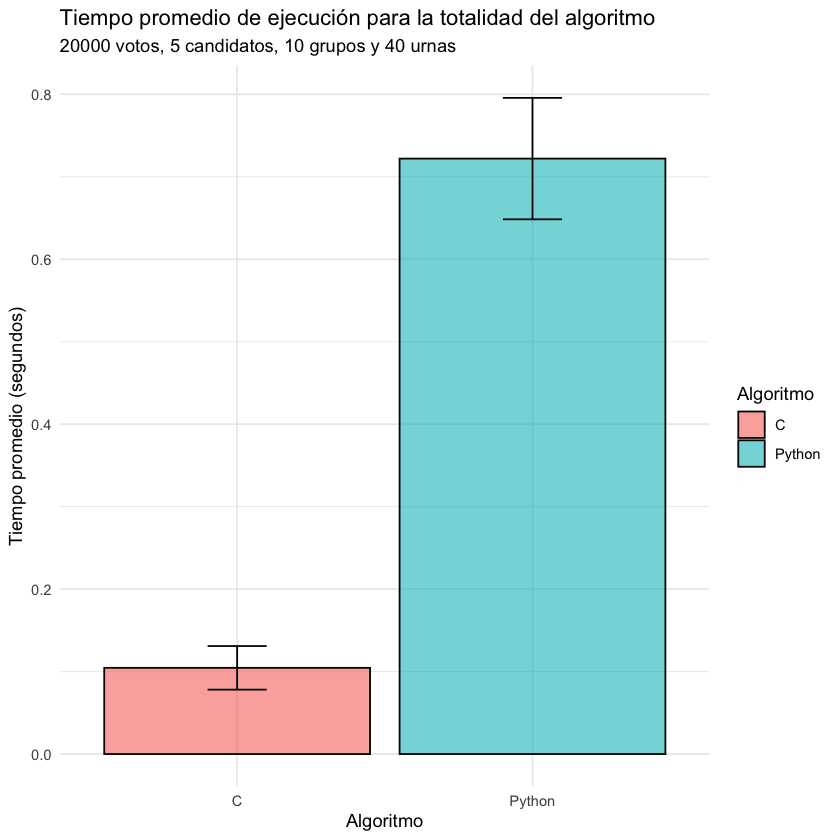

In [12]:
df <- data.frame(
  Iteration = rep(1:11, 2),
  Time = c(CAlgoritm, Python),
  Algoritmo = rep(c("C", "Python"), each = 11)
)

# Calcular medias e intervalos de confianza
library(dplyr)
library(ggplot2)

summary_df <- df %>%
  group_by(Algoritmo) %>%
  summarise(
    mean_time = mean(Time),
    sd_time = sd(Time),
    se_time = sd_time / sqrt(n()), # Error estándar
    ci_lower = mean_time - qt(0.975, df = n() - 1) * se_time, # Límite inferior
    ci_upper = mean_time + qt(0.975, df = n() - 1) * se_time # Límite superior
  )

# Gráfico de barras con intervalos de confianza
ggplot(summary_df, aes(x = Algoritmo, y = mean_time, fill = Algoritmo)) +
  geom_bar(stat = "identity", position = "dodge", color = "black", alpha = 0.6) +
  geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper),
    width = 0.2, position = position_dodge(0.9)
  ) +
  labs(
    title = "Tiempo promedio de ejecución para la totalidad del algoritmo",
    subtitle = "20000 votos, 5 candidatos, 10 grupos y 40 urnas",
    x = "Algoritmo",
    y = "Tiempo promedio (segundos)"
  ) +
  theme_minimal()

# Guardar gráfico como PNG
ggsave(
  filename = "rendimiento.png", # Nombre del archivo
  plot = last_plot(), # Último gráfico creado
  width = 12, # Ancho en pulgadas
  height = 8, # Altura en pulgadas
  dpi = 300, # Resolución (300 es estándar para publicación)
  units = "in", # Unidades (pulgadas)
  bg = "white"
)